In [69]:
import cv2
import matplotlib.pyplot as plt


In [70]:
configFile = 'D:\\Jamil\\VSS_code\\resources\\etc\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozenModel = 'D:\\Jamil\\VSS_code\\resources\\etc\\frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozenModel,configFile)

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)


<dnn_Model 0000029053DFA2F0>

In [71]:
classLabel = []
nameFile = 'D:\\Jamil\\VSS_code\\resources\\text\\classes.txt'
with open(nameFile, 'rt') as file:
    classLabel = file.read().rstrip('\n').split('\n')

print (len(classLabel))

80


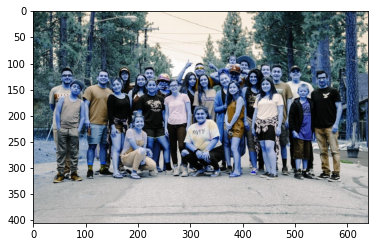

In [72]:
img = cv2.imread('D:\\Jamil\\VSS_code\\resources\\image\\group 1.jpg')
plt.imshow(img)

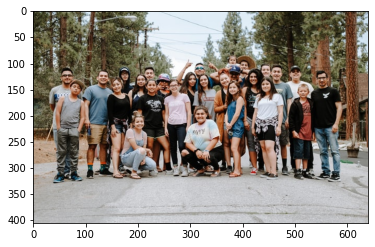

In [73]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [74]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[1 1 1 1 1 1]


In [75]:
fontScale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassIn, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img, boxes, (255,0,0),2)
    cv2.putText(img,classLabel[ClassIn-1],(boxes[0]+10,boxes[1]+40), font,fontScale=fontScale, color=(0,255,0),thickness=3)

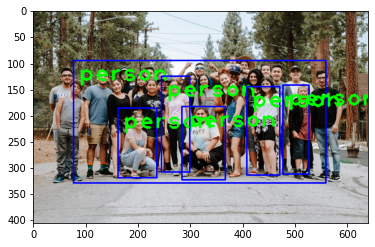

In [76]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))